#### 첫 번째  앱

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris_dataset.DESCR[:193]+"\n ..")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
 ..


In [4]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_dataset.data.shape

(150, 4)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#test_size=0.25
x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, test_size=0.25, random_state=0)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import mglearn

In [11]:
iris_dataframe = pd.DataFrame(x_train, columns= iris_dataset.feature_names)

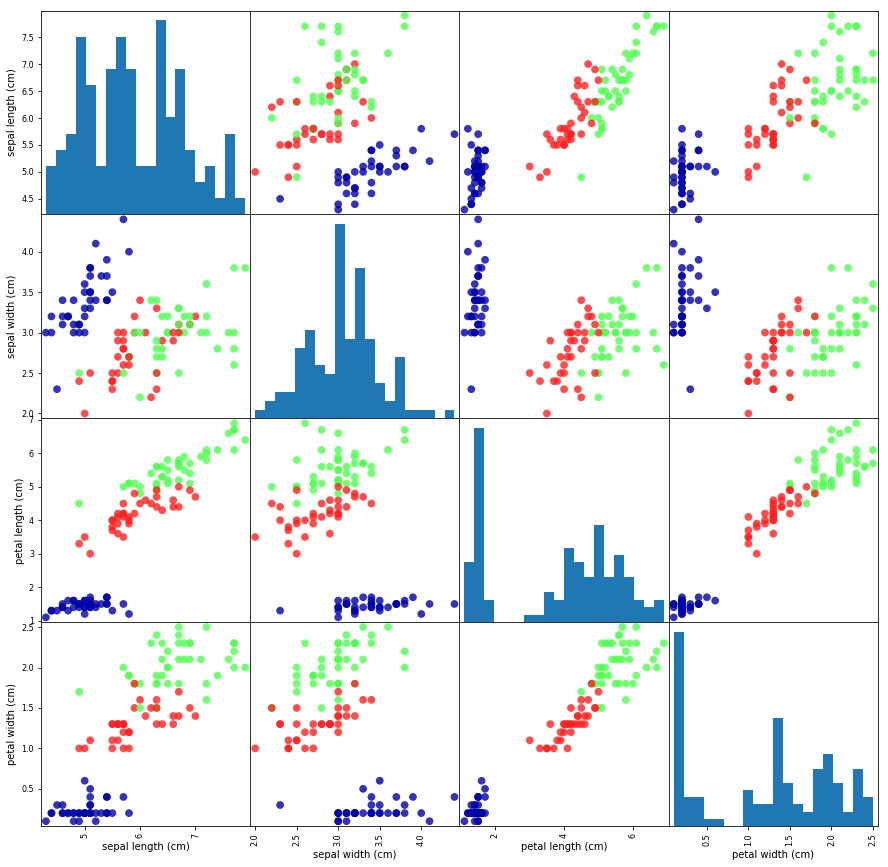

In [12]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
                          hist_kwds={'bins':20}, s=60, alpha=.8, marker='o',
                          cmap=mglearn.cm3);

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
import numpy as np


In [16]:
x_new = np.array([[5,2.9, 1, 0.2]])

In [17]:
prediction = knn.predict(x_new)

In [18]:
prediction

array([0])

In [19]:
iris_dataset.target_names[0]

'setosa'

### 모델 평가하기

In [20]:
y_pred = knn.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [21]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [22]:
"{0:.2f}, {1:.2f}".format(np.mean(y_pred == y_test), knn.score(x_test, y_test))

'0.97, 0.97'

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, test_size=0.25, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)

"{0:.2f}, {1:.2f}".format(np.mean(y_pred == y_test), knn.score(x_test, y_test))

'0.97, 0.97'

In [24]:
knn.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')>

In [25]:
import pickle

In [26]:
pickle.dump(knn, open('knn.pkl','wb'))


In [27]:
model=pickle.load(open('knn.pkl','rb'))

In [32]:
model.predict([[10,2,20,10]])[0]

2

In [33]:
iris_dataset.target_names[model.predict([[10,2,20,10]])[0]]

'virginica'